In [1]:
import pickle

predictions_svr = pickle.load(open('validation_set_predictions_svr.pickle', 'rb'))
predictions_rf = pickle.load(open('validation_set_predictions_rf.pickle', 'rb'))
predictions_svr.shape, predictions_rf.shape

((516, 2), (516, 2))

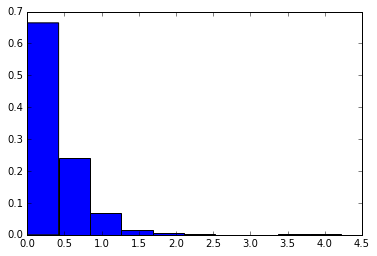

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

differences = []
for x, y in zip(predictions_rf.ic50_predicted, predictions_svr.ic50_predicted):
    differences.append(abs(x - y))
differences = np.array(differences)
weights = np.ones_like(differences) / len(differences)
plt.hist(differences, weights=weights)
plt.show()

In [3]:
(differences < 0.5).sum() / len(weights)

0.73449612403100772

(0.90034926999570053, 7.2663358814273056e-188)


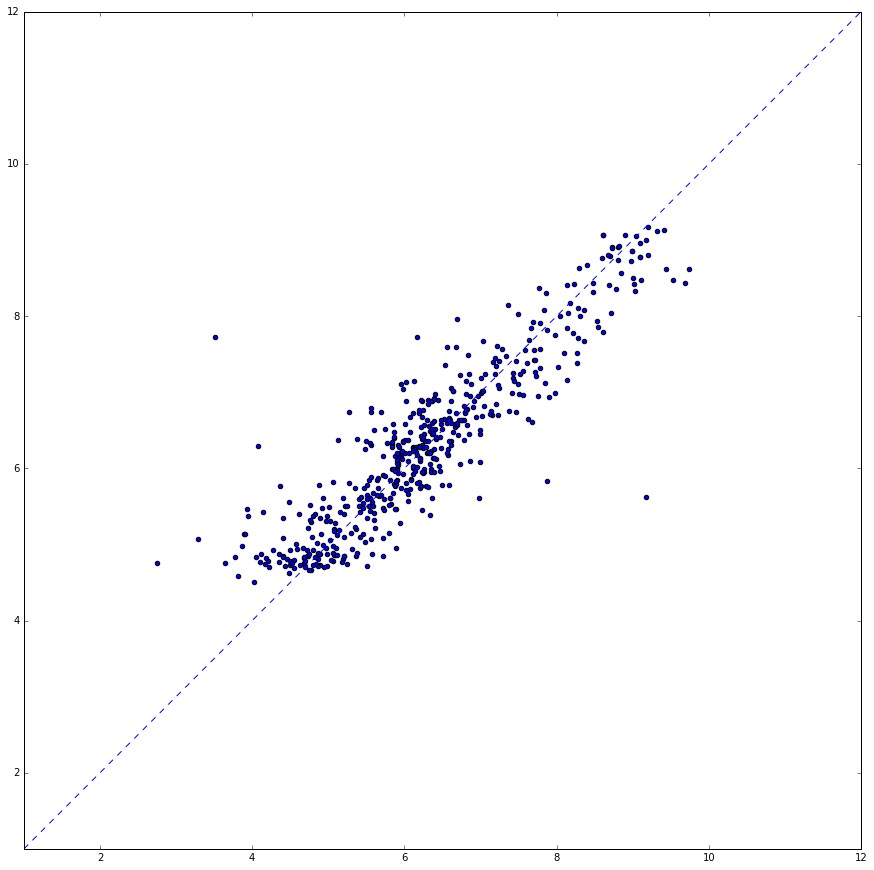

In [4]:
from scipy.stats import pearsonr

plt.rcParams["figure.figsize"] = [15, 15]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

print(pearsonr(predictions_svr.ic50_predicted, predictions_rf.ic50_predicted))

plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')
plt.scatter(
    predictions_svr.ic50_predicted
    , predictions_rf.ic50_predicted
    , c='blue'
    , s=20
)